<AxesSubplot: >

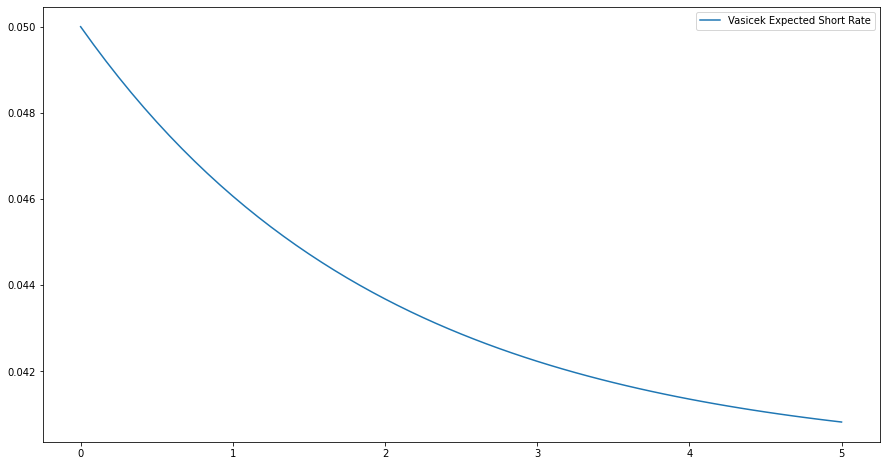

In [51]:
from dynamics import *
import seaborn as sns
import matplotlib.pyplot as plt

testDynamic = Vasicek(initial=0.05, mean=0.02, reversion=-0.5, volatility=0.02)
# testDynamic.create_path(stepsize=1/12, duration=15, seed=2023)
plt.figure(figsize=(15,8))
expected = [testDynamic.expectedRate(x) for x in np.arange(0,5*12+1)/12]
sns.lineplot(x=np.arange(0,5*12+1)/12, y=expected, label="Vasicek Expected Short Rate")


<AxesSubplot: >

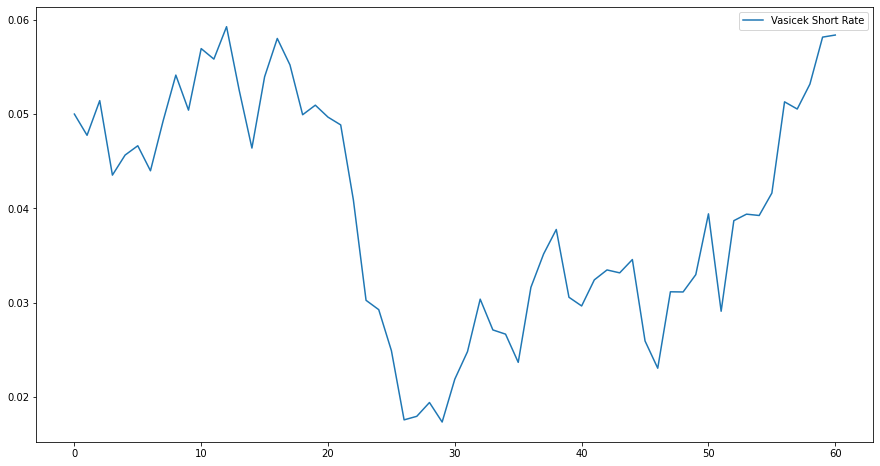

In [78]:
time, rate = testDynamic.create_path(stepsize=1/12, duration=5, seed=1999)
plt.figure(figsize=(15,8))
sns.lineplot(x=time, y=rate, label="Vasicek Short Rate")

<AxesSubplot: >

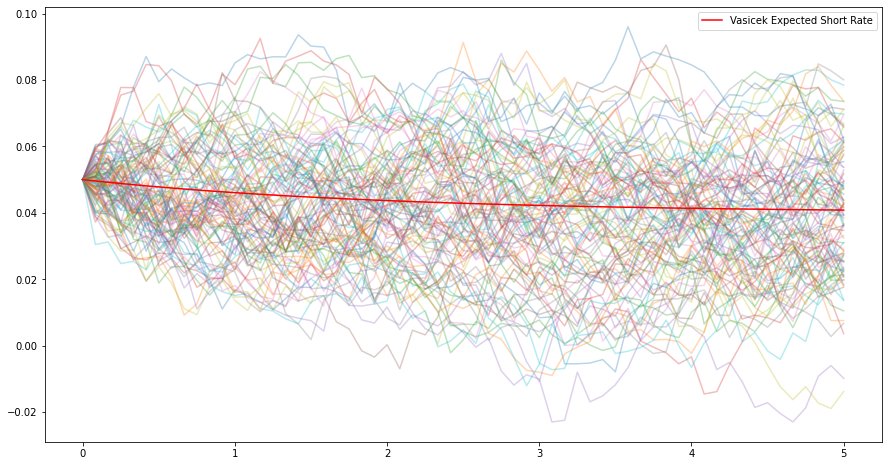

In [53]:
#Some more sims
plt.figure(figsize=(15,8))
for i in range(100):
    time, rate = testDynamic.create_path(stepsize=1/12, duration=5, seed=i)
    sns.lineplot(x=time/12, y=rate, alpha=0.3)
sns.lineplot(x=np.arange(0,5*12+1)/12, y=expected, label="Vasicek Expected Short Rate", c='red')

<AxesSubplot: >

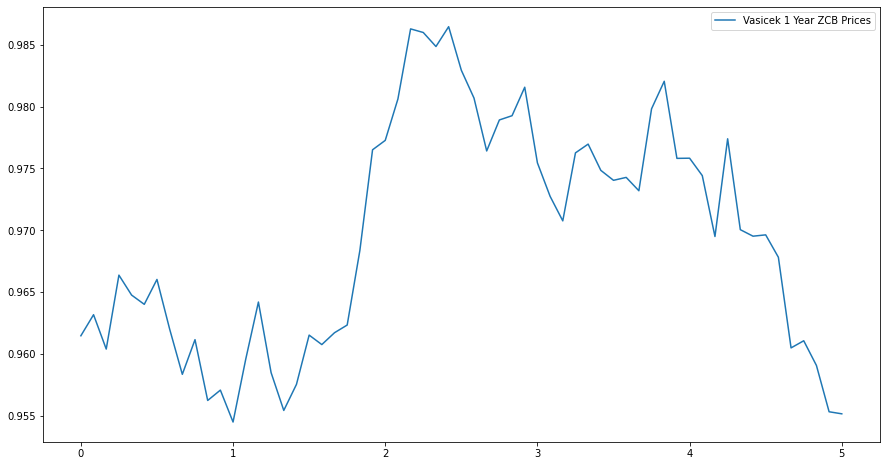

In [79]:
plt.figure(figsize=(15,8))
sns.lineplot(x=time/12, y=[testDynamic.ZCB(1,x) for x in rate], label = "Vasicek 1 Year ZCB Prices")

# Payer Swap testing
For simplicity the fixed and floating payments are equal <br>
The swap is initiated at t=1 and the last swap is made at t=6

<AxesSubplot: >

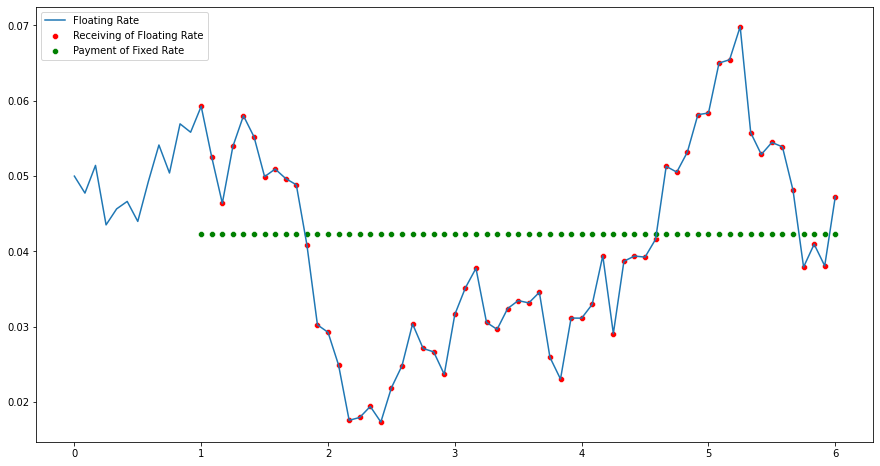

In [80]:
from products import payerSwap
from scipy import optimize
schedule = np.arange(1*12,6*12+1)
time, floatRate = testDynamic.create_path(1/12, 6, 1999)
# (Non analytical way to find par swap rate)
K = optimize.newton(lambda x: payerSwap(time=0, 
    fixedSchedule=schedule, 
    floatingSchedule=schedule, 
    fixedRate=x, 
    floatingRate=floatRate, 
    floatingTimeStamp=time,
    stepsize=1/12,
    model=testDynamic
),
1)
plt.figure(figsize=(15,8))
sns.lineplot(x=time/12, y=floatRate, label='Floating Rate')
sns.scatterplot(x=schedule/12, y=floatRate[12:], label='Receiving of Floating Rate', c='red')
sns.scatterplot(x=schedule/12, y=np.repeat(K, len(schedule)), label='Payment of Fixed Rate', c='green')

<AxesSubplot: >

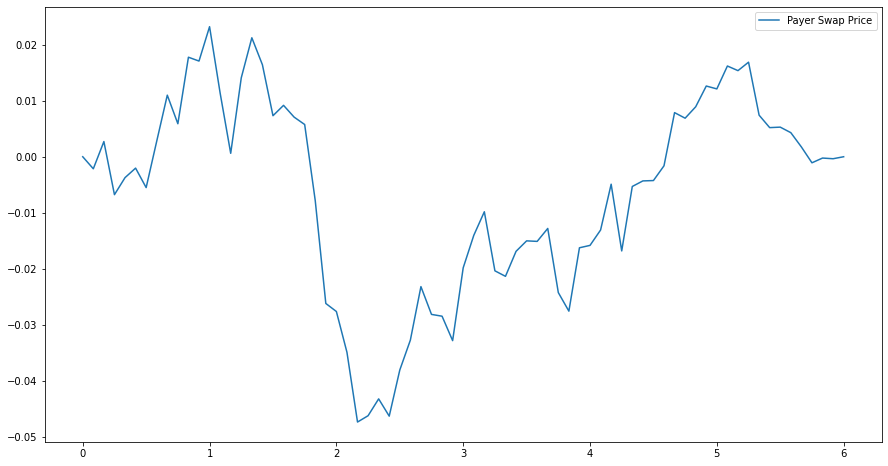

In [81]:

payerSwapPrice = [
payerSwap(
    time=x, 
    fixedSchedule=schedule, 
    floatingSchedule=schedule, 
    fixedRate=K, 
    floatingRate=floatRate, 
    floatingTimeStamp=time,
    stepsize=1/12,
    model=testDynamic
)
for x in time
]

plt.figure(figsize=(15,8))
sns.lineplot(x=time/12, y=payerSwapPrice, label='Payer Swap Price')

<AxesSubplot: >

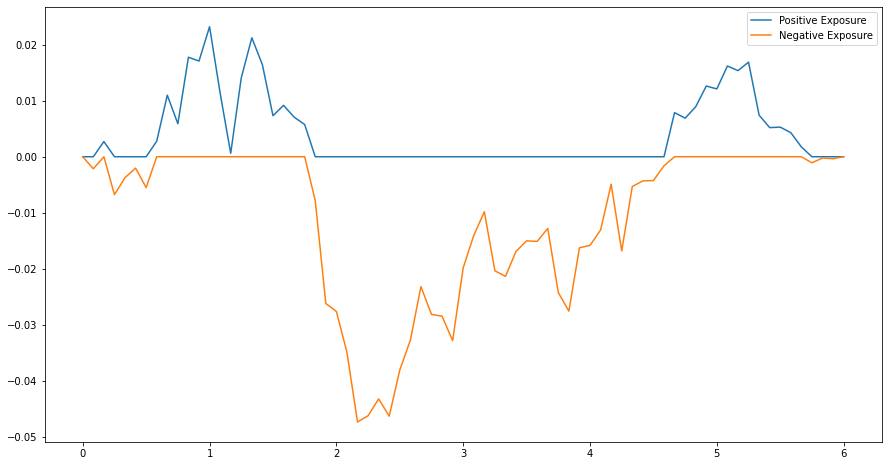

In [82]:
plt.figure(figsize=(15,8))
sns.lineplot(x=time/12, y=np.maximum(payerSwapPrice,0), label='Positive Exposure')
sns.lineplot(x=time/12, y=np.minimum(np.array(payerSwapPrice),0), label='Negative Exposure')

[0.05,
 0.05382922146709923,
 0.05782136445691061,
 0.06198336077601437,
 0.06632243715790813,
 0.07084612781123448,
 0.07556228750189674,
 0.08047910519177848,
 0.08560511825774807,
 0.09094922731563812,
 0.09652071167493921,
 0.102329245451043,
 0.10838491436301155,
 0.11469823324603957,
 0.121280164309018,
 0.12814213616890002,
 0.1352960636949208,
 0.14275436869712732,
 0.15053000149514073,
 0.1586364634046034,
 0.16708783018035425,
 0.17589877645703883,
 0.1850846012295916,
 0.19466125441783408,
 0.20464536456131407,
 0.2150542676924752,
 0.2259060374382896,
 0.23721951640262282,
 0.2490143488838205,
 0.26131101498432746,
 0.27413086617156573,
 0.28749616235181724,
 0.301430110521486,
 0.31595690506285196,
 0.3311017697542839,
 0.34689100156785735,
 0.3633520163304258,
 0.3805133963274283,
 0.3984049399320927,
 0.41705771334620734,
 0.4365041045423027,
 0.45677787950090565,
 0.4779142408405158,
 0.49994988894210357,
 0.5229230856742696,
 0.5468737208297101,
 0.5718433813883493,
 0